<a href="https://colab.research.google.com/github/ektaarora3501/tensorflow/blob/master/classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu

In [2]:
from google.colab import files
uploaded=files.upload()

Saving books.csv to books (1).csv


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

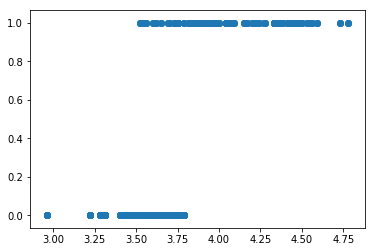

In [65]:
import io
df2=io.BytesIO(uploaded['books.csv'])
rating=np.array(pd.read_csv(df2,usecols=[3],skiprows=[0],header=None,nrows=200))
#print(float(rating[0]),type(rating[0]))
#pd.to_numeric(rating)
#print(rating)
#for i in  range(0,200):
 # if rating[i]>3.8:
  #  print("true")
  #else:
    #print("false")

for i in  range(0,200):
  if (rating[i]) > 3.8:
    
    np.append(x_positive,rating[i])
    
  else:
    x_negative=np.append(x_negative,rating[i])
    
#print(x_positive)    
#print(x_negative)
label=[1.]*len(x_positive)+[0.]*len(x_negative)
#print(label)
xs=np.append(x_positive,x_negative)
plt.scatter(xs,label)
plt.show()
    
  

w_val [1.9999982 7.5939198]


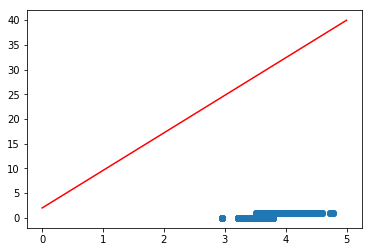

In [82]:
learning_rate=0.01
training_epoch=200
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

def model(X,w):
  return tf.add(tf.multiply(w[1],tf.pow(X,1)),tf.multiply(w[0],tf.pow(X,0)))

w=tf.Variable([0.,0.],name="weight")
y_model=model(X,w)

cost=tf.reduce_mean(Y-y_model)
train_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epoch):
  sess.run(train_op,feed_dict={X:xs,Y:label})
  
w_val=sess.run(w)
print("w_val",w_val)
sess.close()

plt.scatter(xs,label)

all_xs=np.linspace(0,5,5)

plt.plot(all_xs,all_xs*w_val[1]+w_val[0],'r')
plt.show()